# Project 3(3): NLP - Preprocessing

Done by: Richelle-Joy Chia, a Redditor-and-data-science enthusiast! 

Problem statement: Through natural language processing and classification models, how can we help Reddit and other interested parties classify posts based on the texts used by people who may be depressed or anxious? Furthermore, how can sentiment analysis be utilized to detect emotions associated with depression and anxiety?

## Pre-processing steps

- Remove special characters
- Tokenizing
- Lemmatizing/Stemming
- Stop word removal
- Convert text data into a structured and numeric df 

In [1]:
#import libraries 

import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
import seaborn as sns
import sys
import tensorflow.keras
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV # split our data and run hyperparameter search
from sklearn.pipeline import Pipeline # to compactly pack multiple modeling operations
from sklearn.naive_bayes import BernoulliNB, MultinomialNB # to build our classification model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # to access results from binary classification task (you may also import other specific classification metrics)
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
from sklearn.linear_model import LogisticRegression
    
# import CountVectorizer and TFIDFVectorizer from feature_extraction.text module in sklearn.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# this setting widens how many characters pandas will display in a column
pd.options.display.max_colwidth = 400

In [2]:
# import data 

data = pd.read_csv('../joined.csv')

In [3]:
# setting subreddit categories as target

target = data['subreddit']

#### Convert data types and count number of characters and words

In [4]:
data['selftext'] = data['joined'].astype(str)

In [5]:
data['char_count'] = data['joined'].map(len)

In [6]:
data['word_count'] = data['joined'].map(lambda x: len(x.split()))

In [7]:
# explore dataset

data.head()

,date_time,subreddit,selftext,title,joined,char_count,word_count
0,2022-10-03 07:50:04,0,"Aching across chest and stomach and tiredness I seem to just be tired all the time at the moment, I also seem to get a fair few chest aches and pains up and down my abdomen that keep making me think oh god I’ve got that horrible illness starting with C, does anyone else experience anything similar to this in terms of the aches and pains and tiredness too ?",Aching across chest and stomach and tiredness,"Aching across chest and stomach and tiredness I seem to just be tired all the time at the moment, I also seem to get a fair few chest aches and pains up and down my abdomen that keep making me think oh god I’ve got that horrible illness starting with C, does anyone else experience anything similar to this in terms of the aches and pains and tiredness too ?",358,70
1,2022-10-03 07:49:48,0,"Very cold hands and feet while anxious Hey, so I have this problem for quite some time. It all started 3 years ago, somehow I just got more depressed, stressed out and tired, bored with my life, thinking about all existential things and such, half year ago I even had quite strong panic attacks and now I am already in a better circumstances I don't get them that much anymore, however I still ge...",Very cold hands and feet while anxious,"Very cold hands and feet while anxious Hey, so I have this problem for quite some time. It all started 3 years ago, somehow I just got more depressed, stressed out and tired, bored with my life, thinking about all existential things and such, half year ago I even had quite strong panic attacks and now I am already in a better circumstances I don't get them that much anymore, however I still ge...",1819,341
2,2022-10-03 07:42:30,0,"Feeling of lost sensation I keep feeling like I’m losing the sensation in my face, arms and body. I think it happens during or after an anxiety attack, but recently I keep getting it at night. It’s not just that wavering feeling when you’re scared or shocked, it’s full on heaviness like I can’t feel my arms. I’m still able to lift them but it really makes me freak out about paralysis and stuff",Feeling of lost sensation,"Feeling of lost sensation I keep feeling like I’m losing the sensation in my face, arms and body. I think it happens during or after an anxiety attack, but recently I keep getting it at night. It’s not just that wavering feeling when you’re scared or shocked, it’s full on heaviness like I can’t feel my arms. I’m still able to lift them but it really makes me freak out about paralysis and stuff",396,74
3,2022-10-03 07:41:39,0,needs someone to talk to.. hi im dealing with intense anxiety and depression.. also a bit of family problems.. i have no one to talk to.. my mom and sister dont understand so anyones chats are open?,needs someone to talk to..,needs someone to talk to.. hi im dealing with intense anxiety and depression.. also a bit of family problems.. i have no one to talk to.. my mom and sister dont understand so anyones chats are open?,198,37
4,2022-10-03 07:38:55,0,"Nothing helps my anxiety apart from benzodiazepines I’ve tried everything cbt therapy antipsychotics, antidepressants off label stuff like gabapentin etc nothing helps enough which is sad 😞 \n\nI’m from uk so can’t get benzodiazepines on prescription but I can get them there only thing that gets me out the house I know there Very addictive but can’t keep going on like this I’ve never went out ...",Nothing helps my anxiety apart from benzodiazepines,"Nothing helps my anxiety apart from benzodiazepines I’ve tried everything cbt therapy antipsychotics, antidepressants off label stuff like gabapentin etc nothing helps enough which is sad 😞 \n\nI’m from uk so can’t get benzodiazepines on prescription but I can get them there only thing that gets me out the house I know there Very addictive but can’t keep going on like this I’ve never went out ...",493,87


In [8]:
# see if data is balanced

data['subreddit'].value_counts(normalize=True)

0    0.500049
1    0.499951
Name: subreddit, dtype: float64

In [9]:
# explore data shape

data.shape

(30481, 7)

In [10]:
# drop any duplicate rows that may have been pulled

data = data.drop_duplicates(subset=['joined'], ignore_index=True)

In [11]:
# explore data shape again 

data.shape

(29975, 7)

In [12]:
# creating custom stop words in dataset after eyeballing dataset 

stop_words = frozenset(['[removed]', 'removed', '[deleted]', 'deleted', 'anxiety','depression','depressed'])
custom_stop_words = stop_words.union(CountVectorizer(stop_words = 'english').get_stop_words())

In [13]:
# storing stopwords

stopwords = custom_stop_words

In [14]:
# tokenization ,stopwords removal and Lemmatization

tokenized_word = data['joined'].apply(lambda x: x.split())
tokenized_word.head()
tokenized_word = tokenized_word.apply(lambda x: [w for w in x if w not in stopwords])

lemmatizer = nltk.stem.WordNetLemmatizer()
tokenized_word = tokenized_word.apply(lambda x: [lemmatizer.lemmatize(i) for i in x]) #lemmatizer
tokenized_word.head()
for i in range(len(tokenized_word)):
    tokenized_word[i] = ' '.join(tokenized_word[i])
#title_pp - column after stopwords removal and lemmatization
data['joined_new'] = tokenized_word
print(data.shape)

(29975, 8)


In [15]:
# reformat using regex

def sub_preprocess(sub):
    sub['joined_new'] = sub['joined_new'].apply(lambda x: re.sub(r"\d]+", "", str(x).lower()))
    sub['joined_new'] = sub['joined_new'].apply(lambda x: re.sub(r"[@\?\.$%_\[\]()+-:*\"]", ' ', x, flags=re.I))

sub_preprocess(data)

#### Convert data types and count number of characters and words after creating the new column 'joined_new'

In [16]:
data['joined_new_char_count'] = data['joined_new'].map(len)

In [17]:
data['joined_new_word_count'] = data['joined_new'].map(lambda x: len(x.split()))

In [18]:
data.head()

,date_time,subreddit,selftext,title,joined,char_count,word_count,joined_new,joined_new_char_count,joined_new_word_count
0,2022-10-03 07:50:04,0,"Aching across chest and stomach and tiredness I seem to just be tired all the time at the moment, I also seem to get a fair few chest aches and pains up and down my abdomen that keep making me think oh god I’ve got that horrible illness starting with C, does anyone else experience anything similar to this in terms of the aches and pains and tiredness too ?",Aching across chest and stomach and tiredness,"Aching across chest and stomach and tiredness I seem to just be tired all the time at the moment, I also seem to get a fair few chest aches and pains up and down my abdomen that keep making me think oh god I’ve got that horrible illness starting with C, does anyone else experience anything similar to this in terms of the aches and pains and tiredness too ?",358,70,aching chest stomach tiredness i just tired time moment i fair chest ache pain abdomen making think oh god i’ve got horrible illness starting c doe experience similar term ache pain tiredness,195,32
1,2022-10-03 07:49:48,0,"Very cold hands and feet while anxious Hey, so I have this problem for quite some time. It all started 3 years ago, somehow I just got more depressed, stressed out and tired, bored with my life, thinking about all existential things and such, half year ago I even had quite strong panic attacks and now I am already in a better circumstances I don't get them that much anymore, however I still ge...",Very cold hands and feet while anxious,"Very cold hands and feet while anxious Hey, so I have this problem for quite some time. It all started 3 years ago, somehow I just got more depressed, stressed out and tired, bored with my life, thinking about all existential things and such, half year ago I even had quite strong panic attacks and now I am already in a better circumstances I don't get them that much anymore, however I still ge...",1819,341,very cold hand foot anxious hey i problem quite time it started year ago i just got depressed stressed tired bored life thinking existential thing such half year ago i quite strong panic attack i better circumstance i don't anymore i anxious time week slight manageable and i year i panic attack anxious i cold hand feet i life life i active working time week age range ...,1086,176
2,2022-10-03 07:42:30,0,"Feeling of lost sensation I keep feeling like I’m losing the sensation in my face, arms and body. I think it happens during or after an anxiety attack, but recently I keep getting it at night. It’s not just that wavering feeling when you’re scared or shocked, it’s full on heaviness like I can’t feel my arms. I’m still able to lift them but it really makes me freak out about paralysis and stuff",Feeling of lost sensation,"Feeling of lost sensation I keep feeling like I’m losing the sensation in my face, arms and body. I think it happens during or after an anxiety attack, but recently I keep getting it at night. It’s not just that wavering feeling when you’re scared or shocked, it’s full on heaviness like I can’t feel my arms. I’m still able to lift them but it really makes me freak out about paralysis and stuff",396,74,feeling lost sensation i feeling like i’m losing sensation face arm body i think happens attack recently i getting night it’s just wavering feeling you’re scared shocked it’s heaviness like i can’t feel arms i’m able lift really make freak paralysis stuff,261,42
3,2022-10-03 07:41:39,0,needs someone to talk to.. hi im dealing with intense anxiety and depression.. also a bit of family problems.. i have no one to talk to.. my mom and sister dont understand so anyones chats are open?,needs someone to talk to..,needs someone to talk to.. hi im dealing with intense anxiety and depression.. also a bit of family problems.. i have no one to talk to.. my mom and sister dont understand so anyones chats are open?,198,37,need talk to hi im dealing intense depression bit

#### Looking at character count and word count of selftext

- Based on both histograms, it seems like the character count and word count for anxiety tend to be relatively stable. For depression, there is a number of cases that wrote more.

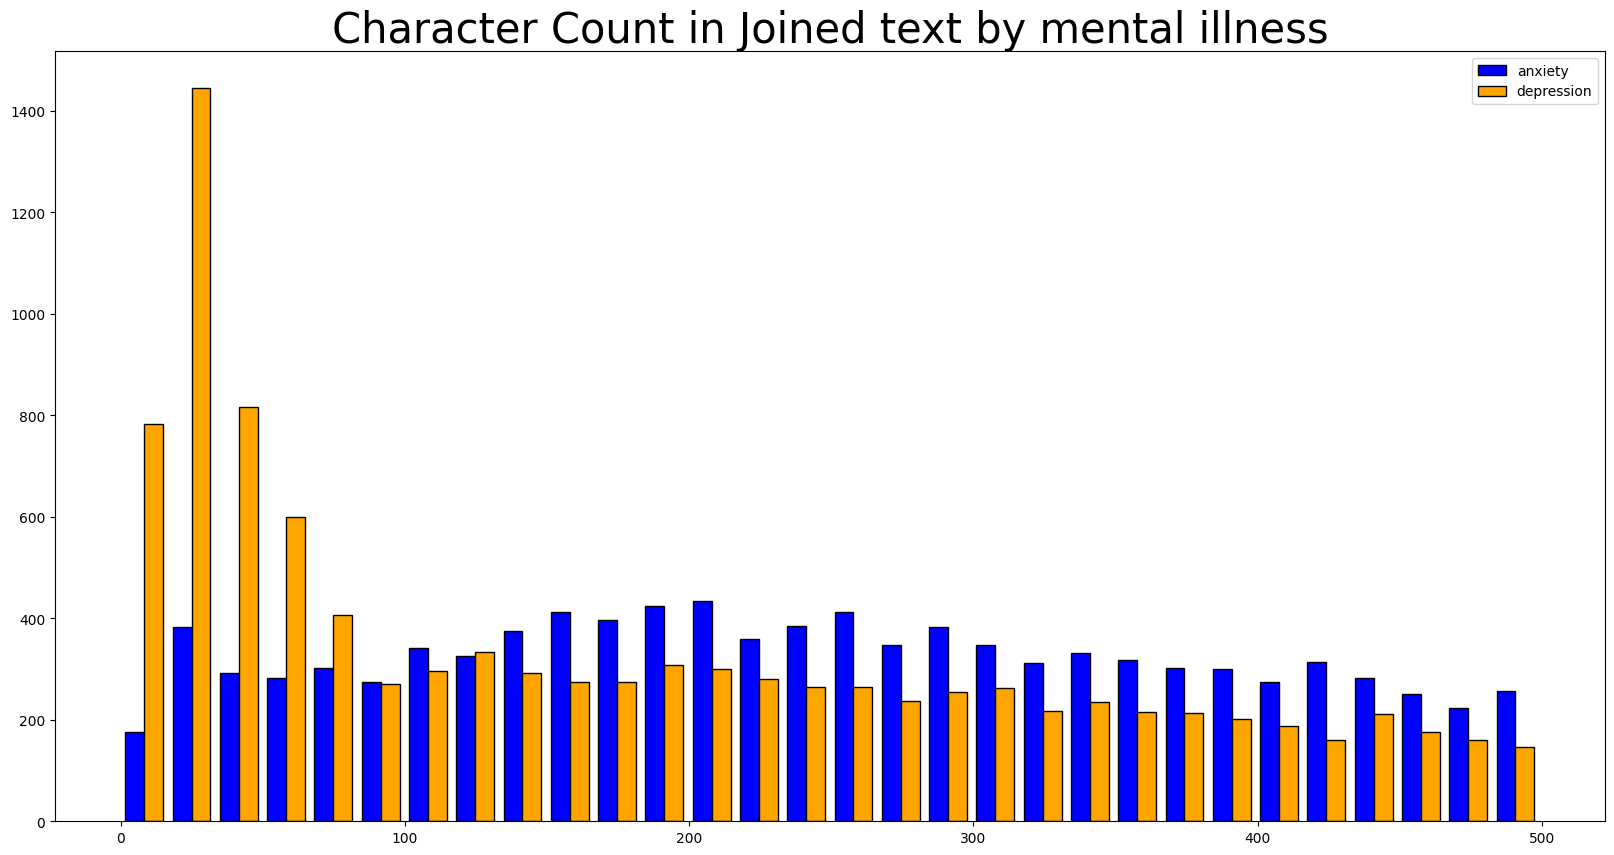

In [19]:
plt.figure(figsize=(20,10))
plt.hist([data[(data['subreddit']==0) & (data['joined_new_char_count'] < 500)]['joined_new_char_count'], 
          data[(data['subreddit']==1) & (data['joined_new_char_count'] < 500)]['joined_new_char_count']],
         bins=30, color=['blue', 'orange'], ec='k')
plt.title('Character Count in Joined text by mental illness', fontsize=30)
plt.legend(['anxiety', 'depression']);

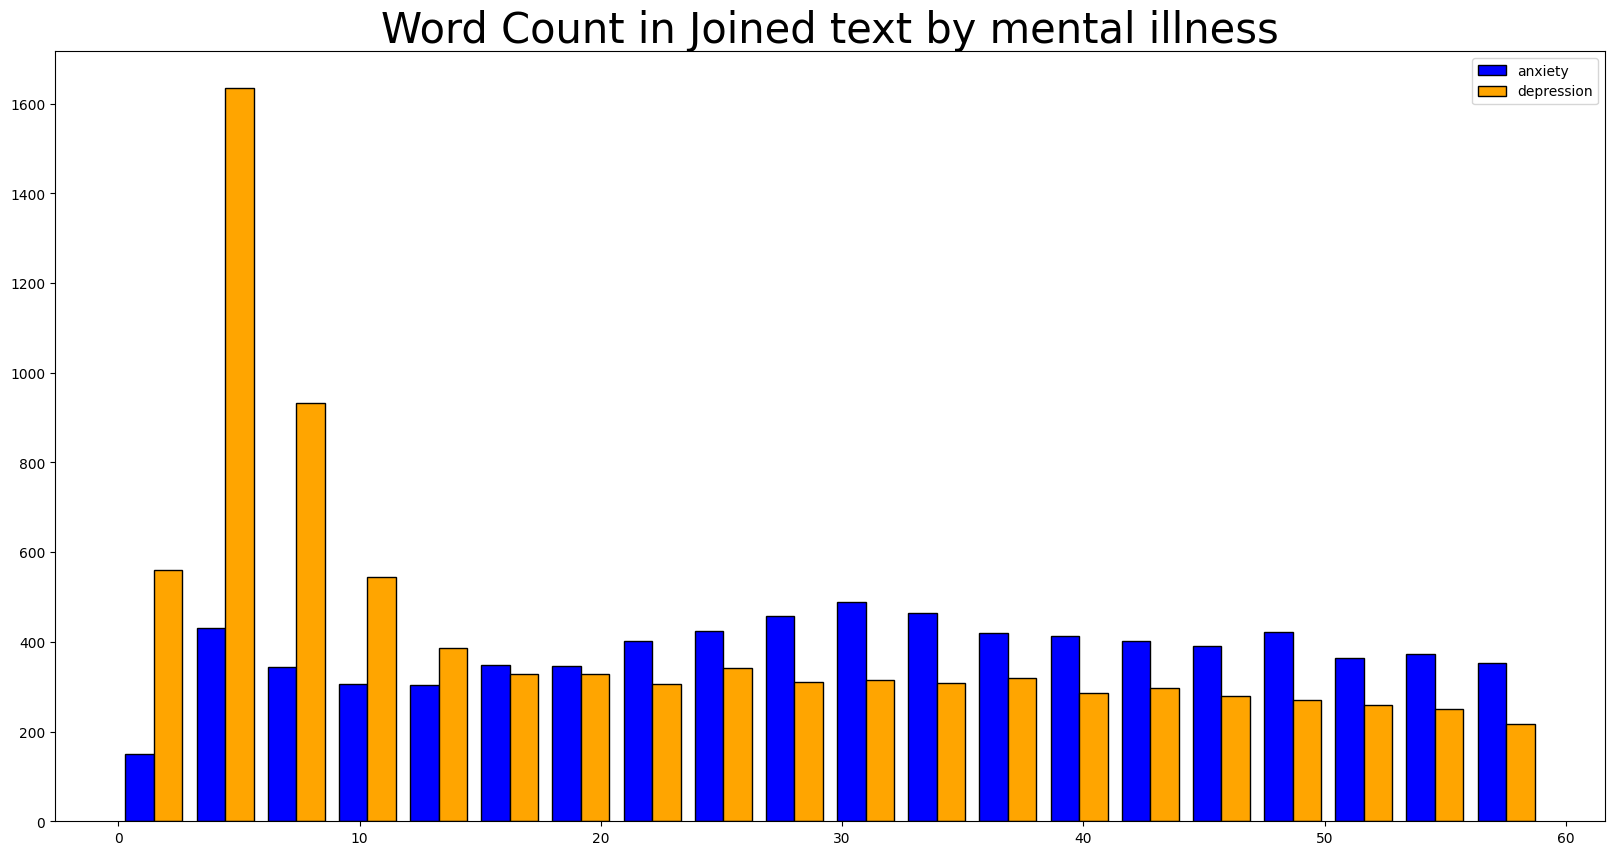

In [20]:
plt.figure(figsize=(20,10))
plt.hist([data[(data['subreddit']==0) & (data['joined_new_word_count'] < 60)]['joined_new_word_count'], 
          data[(data['subreddit']==1) & (data['joined_new_word_count'] < 60)]['joined_new_word_count']],
         bins=20, color=['blue', 'orange'], ec='k')
plt.title('Word Count in Joined text by mental illness', fontsize=30)
plt.legend(['anxiety', 'depression']);

## CountVectorizer

- This step is done to convert a collection of text documents to a matrix of token counts.

In [21]:
# instantiate a CountVectorizer with the default hyperparameters
# tried to include more than 1000 max features but this seems to be the best parameter. 

cvec = CountVectorizer(analyzer='word', stop_words = 'english', min_df = 3, max_df=.98, max_features=1000)
counts = cvec.fit_transform(data.joined_new)
print(counts)
pd.DataFrame(counts.sum(axis=0),columns=cvec.get_feature_names()).T.sort_values(0,ascending=False).head()

  (0, 127)	2
  (0, 817)	1
  (0, 467)	1
  (0, 888)	1
  (0, 885)	1
  (0, 573)	1
  (0, 629)	2
  (0, 536)	1
  (0, 876)	1
  (0, 613)	1
  (0, 357)	1
  (0, 937)	1
  (0, 362)	1
  (0, 427)	1
  (0, 442)	1
  (0, 811)	1
  (0, 219)	1
  (0, 284)	1
  (0, 772)	1
  (0, 863)	1
  (1, 467)	1
  (1, 888)	1
  (1, 885)	4
  (1, 362)	1
  (1, 772)	1
  :	:
  (29974, 61)	1
  (29974, 396)	1
  (29974, 113)	1
  (29974, 322)	1
  (29974, 115)	1
  (29974, 464)	1
  (29974, 879)	1
  (29974, 990)	1
  (29974, 366)	1
  (29974, 398)	1
  (29974, 238)	2
  (29974, 257)	1
  (29974, 596)	1
  (29974, 179)	1
  (29974, 425)	1
  (29974, 388)	1
  (29974, 465)	1
  (29974, 270)	1
  (29974, 201)	1
  (29974, 599)	1
  (29974, 577)	2
  (29974, 26)	1
  (29974, 843)	1
  (29974, 644)	1
  (29974, 259)	1


/Users/richelle-joychia/mambaforge/envs/dsi-sg/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0
just,36304
like,32948
feel,31520
don,23837
ve,18553


In [22]:
# most common words in joined_new (after stopwords removal and lemmatization)

counts = cvec.fit_transform(data.joined_new)
pd.DataFrame(counts.sum(axis=0),columns=cvec.get_feature_names()).T.sort_values(0,ascending=False).head()

/Users/richelle-joychia/mambaforge/envs/dsi-sg/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0
just,36304
like,32948
feel,31520
don,23837
ve,18553


In [23]:
# top 10 most common unigrams

cvec = CountVectorizer(ngram_range=(1,1),stop_words=stopwords)
counts = cvec.fit_transform(data.joined)
pd.DataFrame(counts.sum(axis=0),columns=cvec.get_feature_names()).T.sort_values(0,ascending=False).head(10)

/Users/richelle-joychia/mambaforge/envs/dsi-sg/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0
just,36304
like,32727
feel,27666
don,23837
ve,18553
know,17828
want,15201
life,14713
time,13835
really,13387


In [24]:
# top 10 most common bigrams

cvec = CountVectorizer(ngram_range=(2,2),stop_words=stopwords)
counts = cvec.fit_transform(data.joined)
pd.DataFrame(counts.sum(axis=0),columns=cvec.get_feature_names()).T.sort_values(0,ascending=False).head(10)

/Users/richelle-joychia/mambaforge/envs/dsi-sg/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0
feel like,10219
don know,7019
don want,3712
just want,2525
feels like,2214
panic attack,1985
panic attacks,1737
just feel,1530
just don,1366
mental health,1351


In [25]:
# top 10 most common trigrams

cvec = CountVectorizer(ngram_range=(3,3),stop_words=stopwords)
counts = cvec.fit_transform(data.joined)
pd.DataFrame(counts.sum(axis=0),columns=cvec.get_feature_names()).T.sort_values(0,ascending=False).head(10)

/Users/richelle-joychia/mambaforge/envs/dsi-sg/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0
just feel like,529
just don know,505
don feel like,473
don know anymore,398
feel like going,318
feel like just,288
feel like ve,280
feel like don,262
makes feel like,259
having panic attack,242


In [26]:
# the vectorizer object will be used to transform text to vector form

vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

In [27]:
# apply transformation

tf = vectorizer.fit_transform(data['joined_new']).toarray()

In [28]:
# tf_feature_names tells us what word each column in the matric represents

tf_feature_names = vectorizer.get_feature_names()

/Users/richelle-joychia/mambaforge/envs/dsi-sg/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Time to export data to csv for modeling. 

In [29]:
#save test data 

data.to_csv('./data.csv', index=False)